# Logistic Regression In-Class Exercises

Do these exercises along with the videos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 1.  Linear Classifier

Given the data below, use the `plt.scatter()` function to plot the data points with different colors for the classes.

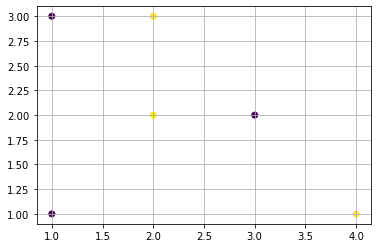

In [2]:
X = np.array([[1,1], [1,3], [2,2], [2,3], [3,2], [4,1]])
y = np.array([0,0,1,1,0,1], dtype=np.int)

# TODO
plt.scatter(X[:,0], X[:,1],c=y)
plt.grid()

You should see that the data is not linearly separable.
Find a linear classifier that makes a minimal number of errors on the training data.

Write a function `predict()` function for the classifer and get the predicted labels with the command:

    yhat = predict(X)

Print `yhat` and `y`.  How many errors does your classifier make?

**Solution:**  You can see that the classifier mis-classifies only one point.

In [3]:
def predict(X):
    # TODO
    z = X[:,0] - 1.5
    yhat = (z > 0).astype(int)
    return yhat

# TODO
#   yhat = predict(X)
#   ...
yhat = predict(X)

print(y)
print(yhat)

[0 0 1 1 0 1]
[0 0 1 1 1 1]


# Question 2:   Logistic Model

Consider the model for the passing a test:

    P(pass test) = 1/(1+exp(-z)),  z =  w0 + w1*hrs_alone + w2*hrs_tutor
    
where `hrs_alone` is the number of hours studied alone and `hrs_tutor` is the number of hours with a tutor.
Given the values below find `w0` for the probability = 0.6.


In [4]:
hrs_alone = 4
hrs_tutor = 1
w1 = 0.2
w2 = 0.5
prob = 0.6

# TODO
#   w0 = ...

# We solve for 1/(1 + exp(-z))=prob 
z = np.log(prob/(1-prob))

# Then we solve for w0
w0 = z - w1*hrs_alone - w2*hrs_tutor
print('w0 = %.2f' % w0)

w0 = -0.89


Given the values above, plot the probability of passing as a function of `hrs_tutor` in the range of 0 to 10 hours.

Text(0, 0.5, &#39;Probability of passing&#39;)

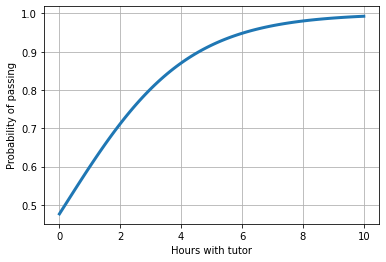

In [5]:
# TODO
hrs_tutor_plot = np.linspace(0,10,100)
z = w0 + w1*hrs_alone + w2*hrs_tutor_plot
prob = 1/(1+np.exp(-z))
plt.plot(hrs_tutor_plot, prob, lw=3)
plt.grid()
plt.xlabel('Hours with tutor')
plt.ylabel('Probability of passing')

## Question 3.  Calculating and Plotting the Binary Cross Entropy Loss

You are given the scalar data `x` and `y` with binary class labels below.

In [6]:
x = np.array([-1,1,3,4,5])
y = np.array([0,0,1,0,1])

Consider a linear classifier of the form:

    z = w[0] + w[1]*x
    yhat = 1 if z > 0 and 0 if z < 0
    
Find `w` that makes at most one error on the training data. Call this selection `w_manual` since you have manually chosen it.

In [7]:
# TODO
#   w_manual = ...
# why??????????????????????????????
# One solution is to select yhat = 1 if x > 2, which corresponds to the following weight.
w_manual = np.array([-2, 1])

Now consider a logistic model,

    z = w[0] + w[1]*x
    p(y=1|x) = 1 / (1 + exp(-z))
    
Complete the function below that computes the binary cross entropy for a given vector `w` and training data `x,y`. Use the function to compute the BCE loss for the `w_manual`. 

In [8]:
def bce_loss(x,y,w):
    # TODO
    # J = BCE loss
    z = w[0] + w[1]*x
    J = np.sum( np.log(1+np.exp(z)) - y*z )
    return J

# Print the loss for `w_manual`
print('BCE loss at w_manual = %7.4f' % bce_loss(x,y,w_manual))

BCE loss at w_manual =  2.8506


Now consider a set of `w = [w0, 0.5]`.  
* Plot the BCE loss over 100 values `w0` from -2.5 to 0  
* What value of `w0`gives the minimum BCE loss?   Call this `w0_opt`.
* What is the minimum BCE loss?

Min BCE =  2.3909
Optimal w0 = -1.7424


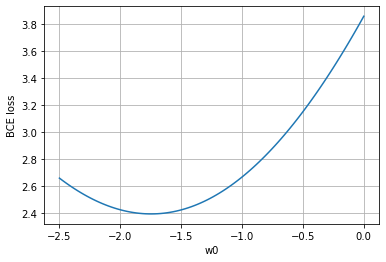

In [9]:
nt = 100
w0_test = np.linspace(-2.5,0,nt)
w1 = 0.5

# TODO
#   loss = ...
#   w0_opt =
loss = np.zeros(nt)
for i, w0 in enumerate(w0_test):
    loss[i] = bce_loss(x,y, [w0_test[i], w1] )
    
plt.plot(w0_test, loss)
plt.grid()
plt.xlabel('w0')
plt.ylabel('BCE loss')

loss_min = np.min(loss)
im = np.argmin(loss)
w0_opt = w0_test[im]

print('Min BCE = %7.4f' % loss_min)
print('Optimal w0 = %7.4f' % w0_opt)

Suppose you select `w1=0.5`and `w0=w0_opt` from the previous section.  What values `x` is `P(y=1|x) > 0.5`?

In [10]:
# TODO.  Describe the set

# We have P(y=1|x) > 0.5 <=> z > 0  <=> w0 + w1*x > 0 <=> x > t = -w0/w1
t = -w0_opt/w1
print('Threshold = %f' % t)

Threshold = 3.484848


## Question 4.  Heart Attack Fit

In this exercise, we fit heart attack data from the UCI website.  We can load it as follows.

In [11]:
## Generate synthetic data
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, na_values='?',header=None, names=names)
df = df.dropna()

Print the first few rows of the data frame.
Print the number of attributes of number of samples

In [12]:
# TODO
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The target will be `num` which is the number of arterial blockages.  Get the target vector `y` from the `df[num]` column.  To make this a binary classification problem, let `y[i] == 1` whenever the number is greater than 0.  Otherwise, `y[i] == 0`.  You will have to convert the value to integer.

In [13]:
# TODO
#   y = ...
y = (np.array(df['num'] ) > 0).astype(int)

Get the data matrix `X` from all the attributes other than `num`.  

In [14]:
# TODO
#  X = ...
X = np.array(df[names[:-1]])

Split the data into traing and test with `test_size=0.25`.

In [15]:
from sklearn.model_selection import train_test_split

# TODO:
#   Xtr, Xts, ytr, yts = ...
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.25)

Scale the training and test data with the `StandardScaler`. 

In [16]:
from sklearn.preprocessing import StandardScaler

# TODO
#  Xtr1 = ...
#  Xts1 = ...
xscal = StandardScaler()
Xtr1 = xscal.fit_transform(Xtr)
Xts1 = xscal.transform(Xts)


Fit the data on the training data set, predict on the test and measure the accuracy.

In [17]:
from sklearn import linear_model
reg = linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr1, ytr)

yhat = reg.predict(Xts1)
print('accuracy = %f' % np.mean(yhat == yts))

accuracy = 0.840000


Create a stem plot of the coefficients.  

&lt;StemContainer object of 3 artists&gt;

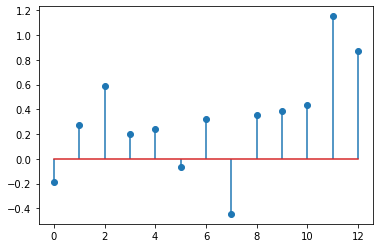

In [18]:

plt.stem(reg.coef_.ravel(), use_line_collection=True)

## Further exercises

If you want to try a little more, see if you can use L1 regularization to find the features that are best in explaining heart blockages.

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
The minimum test error rate =   1.5874e-01, SE=  2.3366e-02
The C value corresponding to minimum error =   1.3257e-01


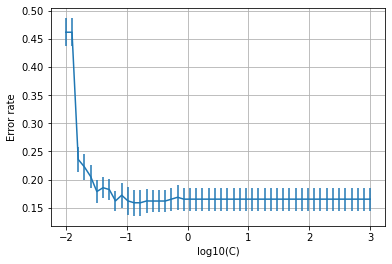

In [19]:
from sklearn.model_selection import KFold
npen = 50
C_test = np.logspace(-2,3,npen)

# Create the cross-validation object and error rate matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

err_rate = np.zeros((npen,nfold))

# Create the logistic regression object
reg = linear_model.LogisticRegression(penalty='l1',solver='liblinear')

for ifold, I in enumerate(kf.split(X)):
    
    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    
    # Scale the data
    scal = StandardScaler()
    Xtr1 = scal.fit_transform(Xtr)
    Xts1 = scal.transform(Xts)    
    
    for ipen, c in enumerate(C_test):
        
        # Set the penalty level        
        reg.C= c
    
        # Fit a model on the training data
        reg.fit(Xtr1, ytr)
    
        # Predict the labels on the test set.
        yhat = reg.predict(Xts1)
        
        
        # Measure the accuracy
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        
    print("Fold %d" % ifold)
    
err_mean = np.mean(err_rate, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)

plt.errorbar(np.log10(C_test), err_mean,yerr=err_se)
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))

In [20]:
# Compute the optimal C with the one SE rule
im = np.argmin(err_mean)
err_tgt = err_mean[im] + err_se[im]

I = np.where(err_mean < err_tgt)[0]
C_opt = C_test[I[0]]

print(C_opt)

0.032374575428176434


&lt;StemContainer object of 3 artists&gt;

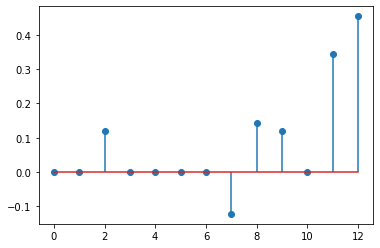

In [21]:
# Create the logistic regression object with the optimal C
reg = linear_model.LogisticRegression(penalty='l1',solver='liblinear', C=C_opt)

# Scale the data
scal = StandardScaler()
X1 = scal.fit_transform(X)

# Fit 
reg.fit(X1,y)

# Plot coefficients
coef = reg.coef_.ravel()
plt.stem(coef, use_line_collection=True)

We print the coefficients to see which are important. You can see that the two most important features (the largest coefficients are) `thal` and `ca`, and then there are four other non-zero ones.

In [22]:
data = {'feature': names[:-1], 'slope': coef}
dfslope = pd.DataFrame(data=data)
dfslope

,feature,slope
0,age,0.000000
1,sex,0.000000
2,cp,0.120708
3,trestbps,0.000000
4,chol,0.000000
5,fbs,0.000000
6,restecg,0.000000
7,thalach,-0.121649
8,exang,0.142946
9,oldpeak,0.121131
